<a href="https://colab.research.google.com/github/krishnan-here/QuantResearch/blob/master/DESC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 # loading the packages
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading data
URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult)

adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


**1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set.  Use a bar graph to conifrm your proportions**





(25000, 15) (12500, 15) (12500, 15)


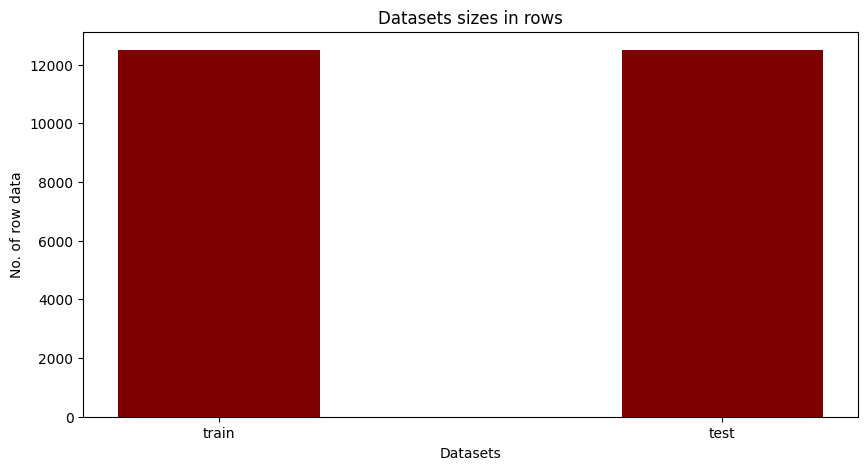

In [4]:
### Show your Code Here ###

border = int(adult.shape[0]/2)
train, test = adult[:border], adult[border:]
print(adult.shape, train.shape, test.shape)

data = {'train':train.shape[0], 'test':test.shape[0]}
dfs = list(data.keys())
vals = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dfs, vals, color ='maroon',
        width = 0.4)
 
plt.xlabel("Datasets")
plt.ylabel("No. of row data")
plt.title("Datasets sizes in rows")
plt.show()

Provide sentence(s) explaining your solution

create a border at center of full dataset and separate, put the values before the border as train data and the valus below the border as the test data

**2. Identify the total number of records in the training data set, and how many records in the training data set have an income value of < 50k**

In [5]:
print(train.shape[0])
under_50_data = train[train["income"] == train["income"].unique()[0]]
under_50_data.shape[0]

12500


9514

# Provide sentence(s) explaining your solution

Find all the unique values in the income column, and filter the first ('<=50')

**3. Use your answers from the previous excercise to calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k**

In [6]:
over_50 = train.shape[0] - under_50_data.shape[0]
print(f"Current Over 50: {over_50/train.shape[0]*100}%")
bal_rows = int(0.35*train.shape[0])- over_50
print(bal_rows)

Current Over 50: 23.888%
1389


Provide sentence(s) explaining your solution

Calculate the current number of records that are over 50k. Calculate number of rows needed to make 35% of the data, then subtract the current number of rows with over 50k.

**4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k**

In [7]:
train_under = train[train["income"] == "<=50K."][:bal_rows]
test_over = test[test["income"] == ">50K."][:bal_rows]

train.drop(list(train_under.index), axis=0, inplace=True)
test.drop(list(test_over.index), axis=0, inplace=True)

train = pd.concat([train, test_over])
test = pd.concat([test, train_under])

train[train["income"] == ">50K."].shape[0]/train.shape[0] * 100

<ipython-input-7-ed2707a09a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(list(train_under.index), axis=0, inplace=True)
<ipython-input-7-ed2707a09a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(list(test_over.index), axis=0, inplace=True)


35.0

Provide sentence(s) explaining your solution

Select rows in the train data that have under 50K that would need to be removed inorder to get 35% of the rows with over 50K in income. Equally, select rows with over 50K in income from the test data that would need to be transferred to the train data to achieve the 35% over 50K in train data.

**5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?**

In [8]:
from statsmodels.stats.weightstats import ztest

ztest(train["age"], test["age"], value=0, alternative="two-sided")
# Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. 

(7.597923255999398, 3.009206875932049e-14)

Provide sentence(s) explaining your solution

#H0: there is no difference between the train mean with the test mean. The test-statistic is 7.598 and the corresponding p-value is very small and much much less than 0.05.



**6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?**

In [10]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

significance = 0.5
# our samples - 35% of incomes are >50K in train, and ~13% of incomes in test are  >50K.

over_50_train, sample_size_train = (train[train["income"] == ">50K."].shape[0], train.shape[0])
over_50_test, sample_size_test = (test[test["income"] == ">50K."].shape[0], test.shape[0])
# check for null ( H0 == H1)
successes = np.array([over_50_train, over_50_test])
samples = np.array([sample_size_train, sample_size_test])

stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# REPORT 
# H0: There is no difference in over 50 incomes between train and test data
# H1: There is a difference in over 50 incomes between train and test data 
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - the alternative hypothesis is true")


z_stat: 40.998, p_value: 0.000
Reject the null hypothesis - the alternative hypothesis is true


Provide sentence(s) explaining your solution

**Please use the following dataset for problems 7 - 8**

In [11]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

loan_test = pd.read_csv(URL_loan_test)
loan_training = pd.read_csv(URL_loan_training)

# NB: comment (#) on this line to use the full dataset 
#loan_training = loan_training[:int(loan_training.shape[0]*0.5)]

loan_test
loan_training

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,397,1000,450.0
1,F,0.00,403,500,225.0
2,F,0.00,408,1000,450.0
3,F,0.00,408,2000,900.0
4,F,0.00,411,5000,2250.0
...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0
150298,T,0.38,722,17000,7650.0
150299,T,0.38,747,11000,4950.0
150300,T,0.39,679,10000,4500.0


**7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?**

In [12]:
from sklearn import tree
import graphviz

target = {"T":1, "F":0}
loan_training["Approval"] = loan_training["Approval"].apply(lambda x: target[x])
y_train = loan_training["Approval"]
X_train = loan_training.drop(["Approval"], axis=1)
y_train.shape, X_train.shape, loan_training.shape

((150302,), (150302, 4), (150302, 5))

In [ ]:

model = tree.DecisionTreeClassifier(random_state=0)
clf = model.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf,
                  out_file=None,
                   feature_names=X_train.columns, 
                   class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                   filled=True, 
                   rounded=True)
graphviz.Source(dot_data)


Provide sentence(s) explaining your solution

**8. Create a CART model using the test data set that uses the same target and predictor variables.  Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?  Does the tree built using the test data match the tree built using the training data?**

In [13]:
target = {"T":1, "F":0}
loan_test["Approval"] = loan_test["Approval"].apply(lambda x: target[x])
y_test = loan_test["Approval"]
X_test = loan_test.drop(["Approval"], axis=1)

model = tree.DecisionTreeClassifier(random_state=0)
clf = model.fit(X_test, y_test)
dot_data = tree.export_graphviz(clf,
                  out_file=None,
                   feature_names=X_test.columns, 
                   class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                   filled=True, 
                   rounded=True)
graphviz.Source(dot_data)


Provide sentence(s) explaining your solution